<a href="https://colab.research.google.com/github/Usama-Amjad/Bank_Loan_Approval_Prediction_Using_Artificial_Neural_Nets/blob/master/Bank_Loan_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK #1: IMPORT DATASETS AND LIBRARIES

In [1]:
!pip install jupyterthemes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [7]:
# Load dataset
bank_df=pd.read_csv('/content/UniversalBank.csv')

In [8]:
# Visualize dataset
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [9]:
#Determining Samples  present in the Universal Bank Dataset
bank_df.shape

(5000, 14)

In [10]:
bank_df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


# TASK #2: PERFORM EXPLORATORY DATA ANALYSIS

In [11]:
# Obtain dataframe info
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [12]:
# Obtain the statistical summary of the dataframe
bank_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [13]:
# For better visualization
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [14]:
# See how many null values exist in the dataframe
bank_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [15]:
# %age of customers having creditcard

creditcard = bank_df[bank_df['CreditCard']==1]
nocreditcard = bank_df[bank_df['CreditCard']!=1]

percentage_of_cc = len(creditcard)/len(bank_df)*100

print(percentage_of_cc,'%')

29.4 %


In [16]:
# %age of customers having loans request accepted
accepted_loans=bank_df[bank_df['Personal Loan']==1]

accepted_customers_percent=len(accepted_loans)/len(bank_df)*100
print(accepted_customers_percent,'%')

9.6 %


# TASK #3: PERFORM DATA VISUALIZATION

<Axes: xlabel='Personal Loan', ylabel='count'>

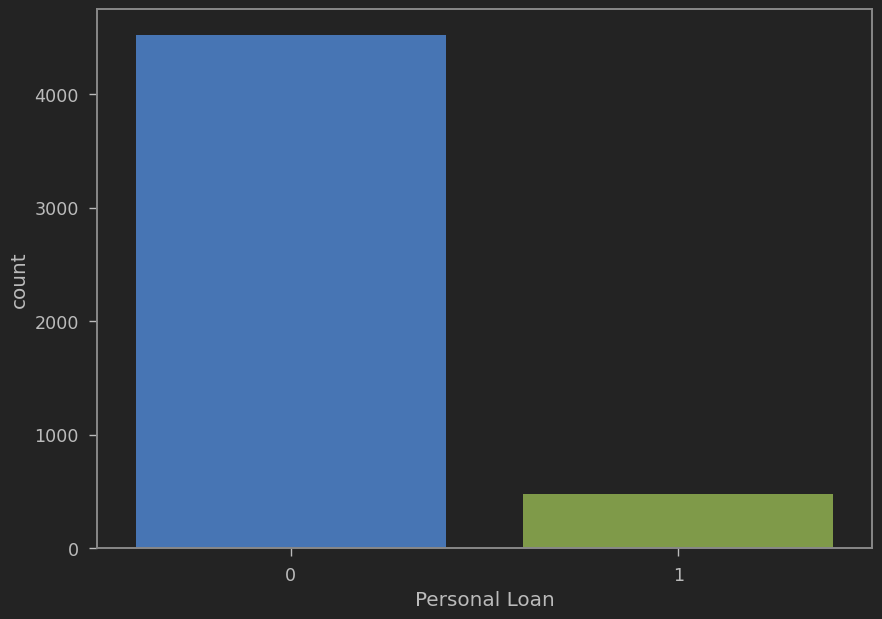

In [17]:
# Visualize personal Loan column 
# Percentage of customers who accepted personal loan ~ 9%
plt.figure(figsize=(10,7))
sns.countplot(x=bank_df['Personal Loan'])
# bank_df['Personal Loan'].value_counts()

<Axes: xlabel='Education', ylabel='count'>

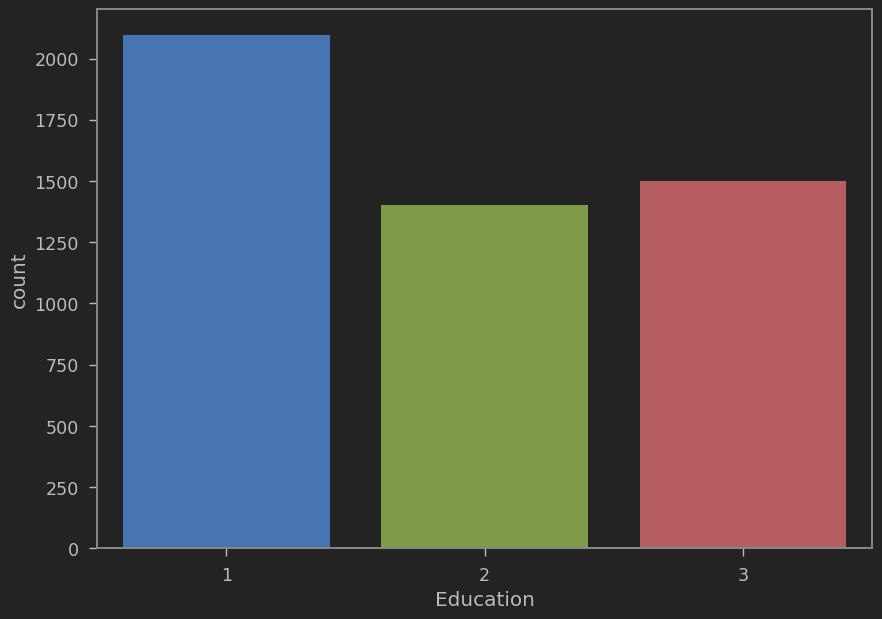

In [18]:
# Visualize Education feature
plt.figure(figsize=(10,7))
sns.countplot(x=bank_df['Education'])

<Axes: xlabel='Age', ylabel='count'>

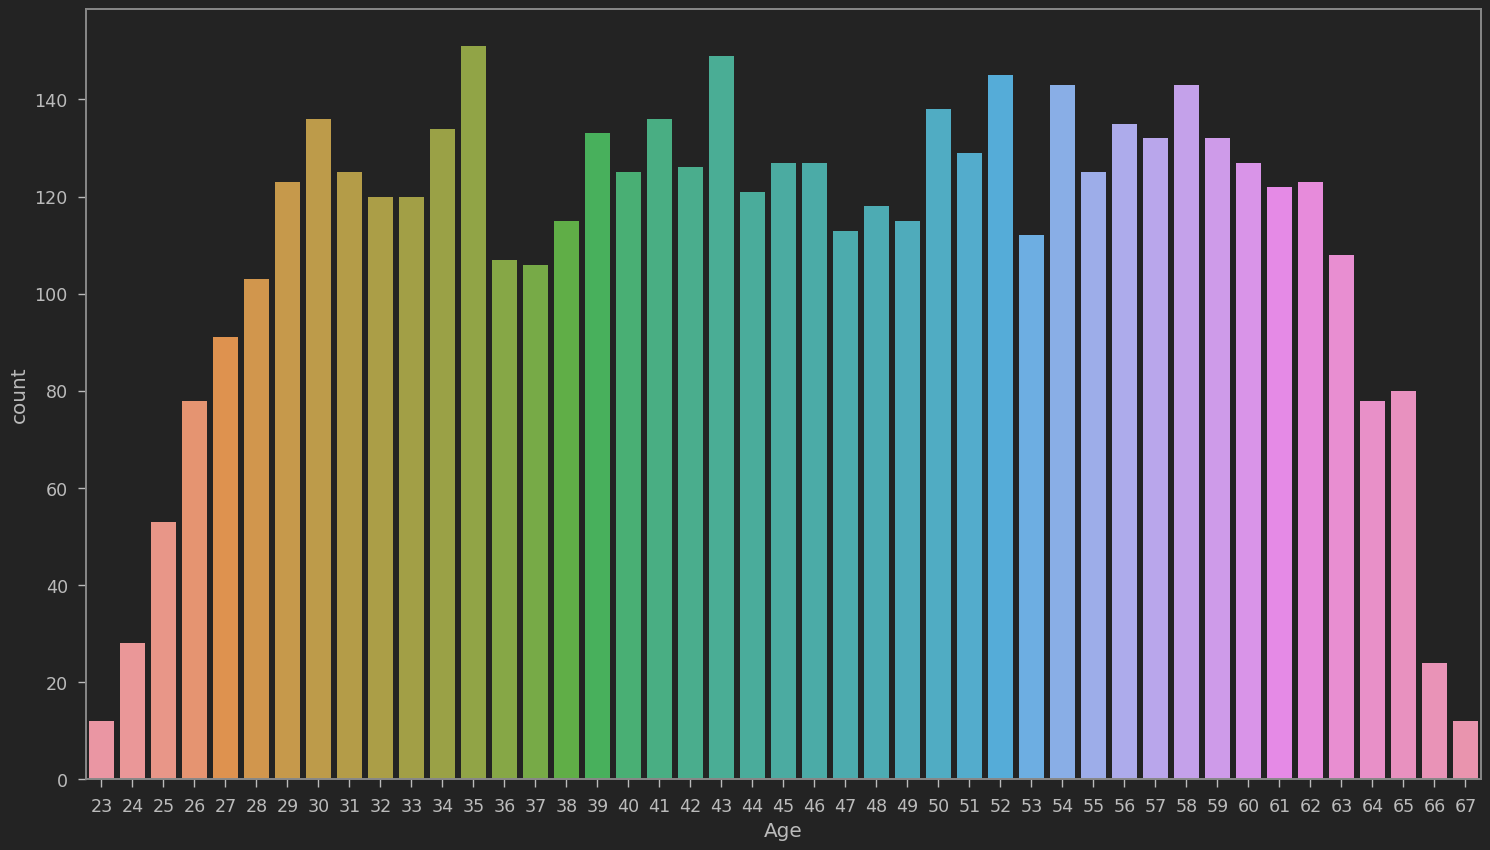

In [19]:
# Visualize Age
# Uniform distribution between 30-60 years
plt.figure(figsize=(18,10))
sns.countplot(x=bank_df['Age'])

<Axes: xlabel='CreditCard', ylabel='count'>

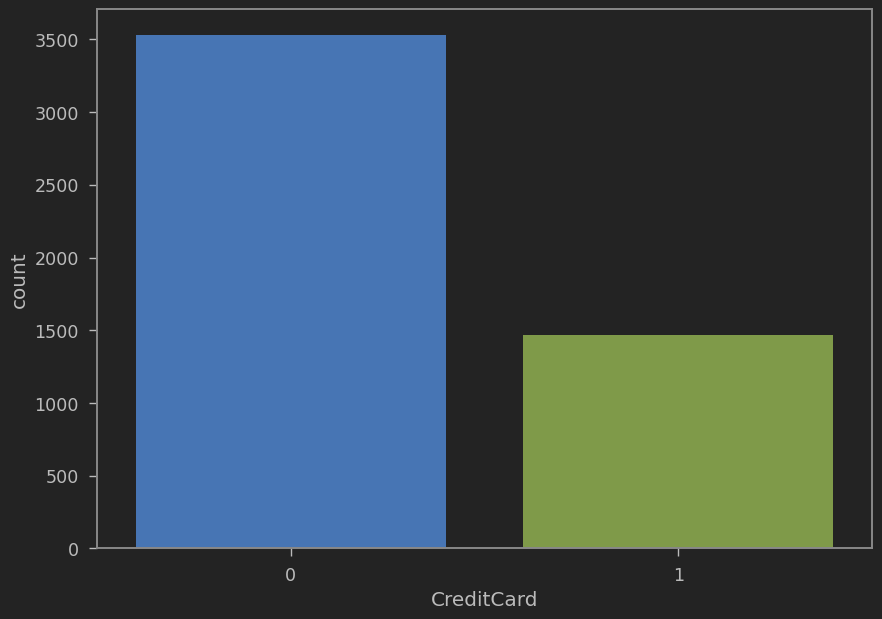

In [20]:
# Visualize credit card availability feature
# Recall that ~29% of customers have credit cards
plt.figure(figsize=(10,7))
sns.countplot(x=bank_df['CreditCard'])

<ipython-input-21-cf7855b148a6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=bank_df['Income'])


<Axes: ylabel='Density'>

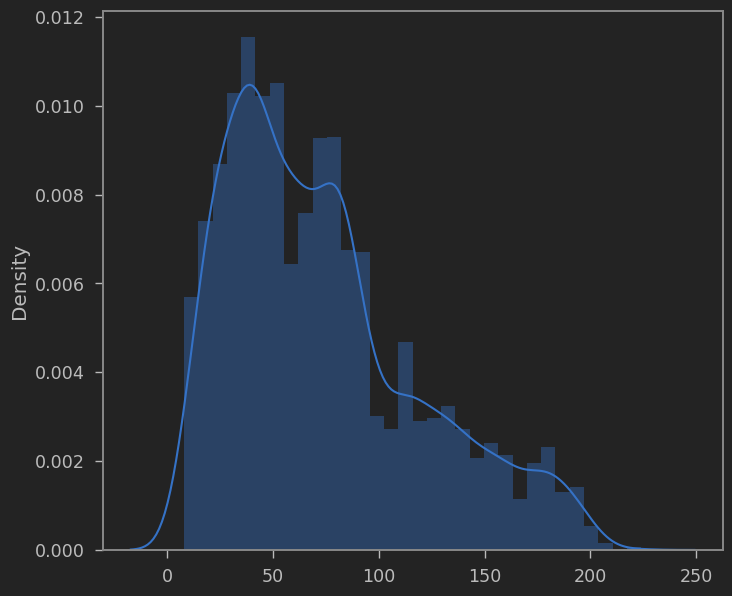

In [21]:
# Visualize income data
# Most customers have incomes that range between 45K and 60K per year
# Data is skewed with less customers earning above 100K
sns.distplot(x=bank_df['Income'])

In [22]:
# Create two dataframes for the two classes
personalloans = bank_df[bank_df['Personal Loan'] == 1]
no_personalloans = bank_df[bank_df['Personal Loan'] == 0]

In [23]:
personalloans

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
16,17,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
18,19,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
29,30,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
38,39,42,18,141,94114,3,5.0,3,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,4884,38,13,129,92646,3,4.1,3,0,1,0,1,1,1
4927,4928,43,19,121,94720,1,0.7,2,0,1,0,1,1,1
4941,4942,28,4,112,90049,2,1.6,2,0,1,0,0,1,0
4962,4963,46,20,122,90065,3,3.0,3,0,1,0,1,1,1


In [24]:
# Mean income of customers who have personal loans is generally high ~ 144K and average CC of 3.9K
personalloans.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.0,480.000000,480.000000,480.00000,480.000000
mean,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,1.0,0.125000,0.291667,0.60625,0.297917
std,1394.393674,11.590964,11.582443,31.584429,1759.223753,1.115393,2.097681,0.753373,160.847862,0.0,0.331064,0.455004,0.48909,0.457820
min,10.000000,26.000000,0.000000,60.000000,90016.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
25%,1166.500000,35.000000,9.000000,122.000000,91908.750000,2.000000,2.600000,2.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
50%,2342.000000,45.000000,20.000000,142.500000,93407.000000,3.000000,3.800000,2.000000,0.000000,1.0,0.000000,0.000000,1.00000,0.000000
75%,3566.000000,55.000000,30.000000,172.000000,94705.500000,4.000000,5.347500,3.000000,192.500000,1.0,0.000000,1.000000,1.00000,1.000000
max,4981.000000,65.000000,41.000000,203.000000,96008.000000,4.000000,10.000000,3.000000,617.000000,1.0,1.000000,1.000000,1.00000,1.000000


In [25]:
no_personalloans

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [26]:
# Mean income of customers who have do not have personal loans is generally low ~ 66K and average CC of 1.7K
no_personalloans.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.0,4520.000000,4520.000000,4520.000000,4520.000000
mean,2512.165487,45.367257,20.132301,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.0,0.102212,0.035841,0.595796,0.293584
std,1448.299331,11.450427,11.456672,40.578534,2156.949654,1.148771,1.567647,0.839975,92.038931,0.0,0.302961,0.185913,0.490792,0.455454
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1259.750000,35.000000,10.000000,35.000000,91911.000000,1.000000,0.600000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,2518.500000,45.000000,20.000000,59.000000,93437.000000,2.000000,1.400000,2.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,3768.250000,55.000000,30.000000,84.000000,94608.000000,3.000000,2.300000,3.000000,98.000000,0.0,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,8.800000,3.000000,635.000000,0.0,1.000000,1.000000,1.000000,1.000000


<ipython-input-27-3840f1d5ee93>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(personalloans['Income'],color='g')
<ipython-input-27-3840f1d5ee93>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(no_personalloans['Income'],color='r')


<Axes: xlabel='Income', ylabel='Density'>

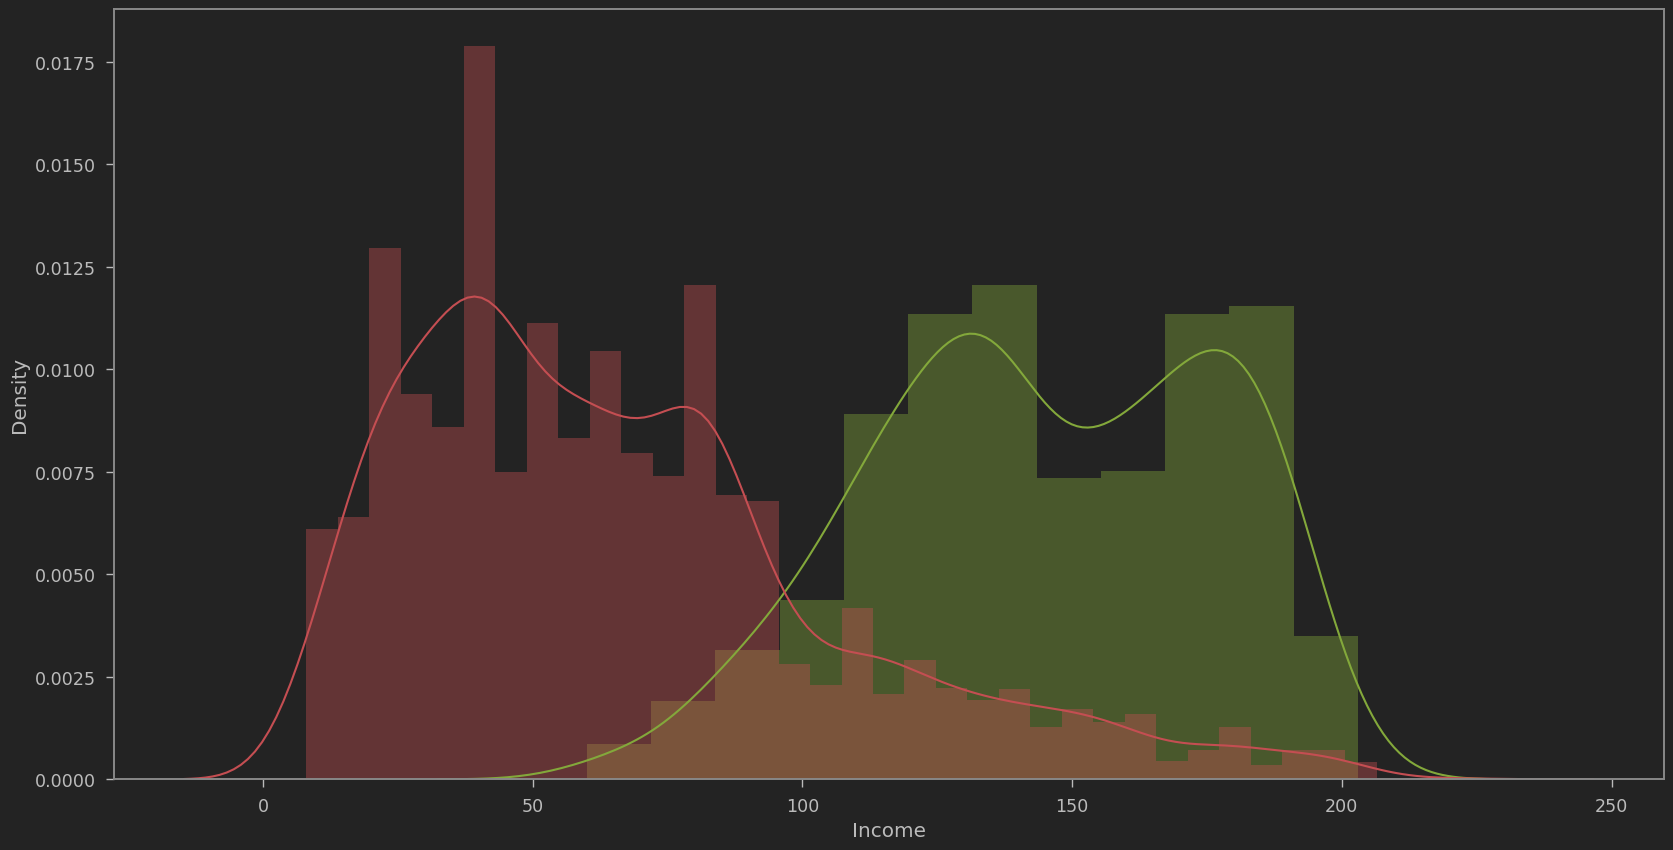

In [27]:
# Plot the distribution plot for both classes separately 
# Customers who took personal loans tend to have higher income
plt.figure(figsize = (20, 10))
sns.distplot(personalloans['Income'],color='g')
sns.distplot(no_personalloans['Income'],color='r')

<Figure size 3000x3000 with 0 Axes>

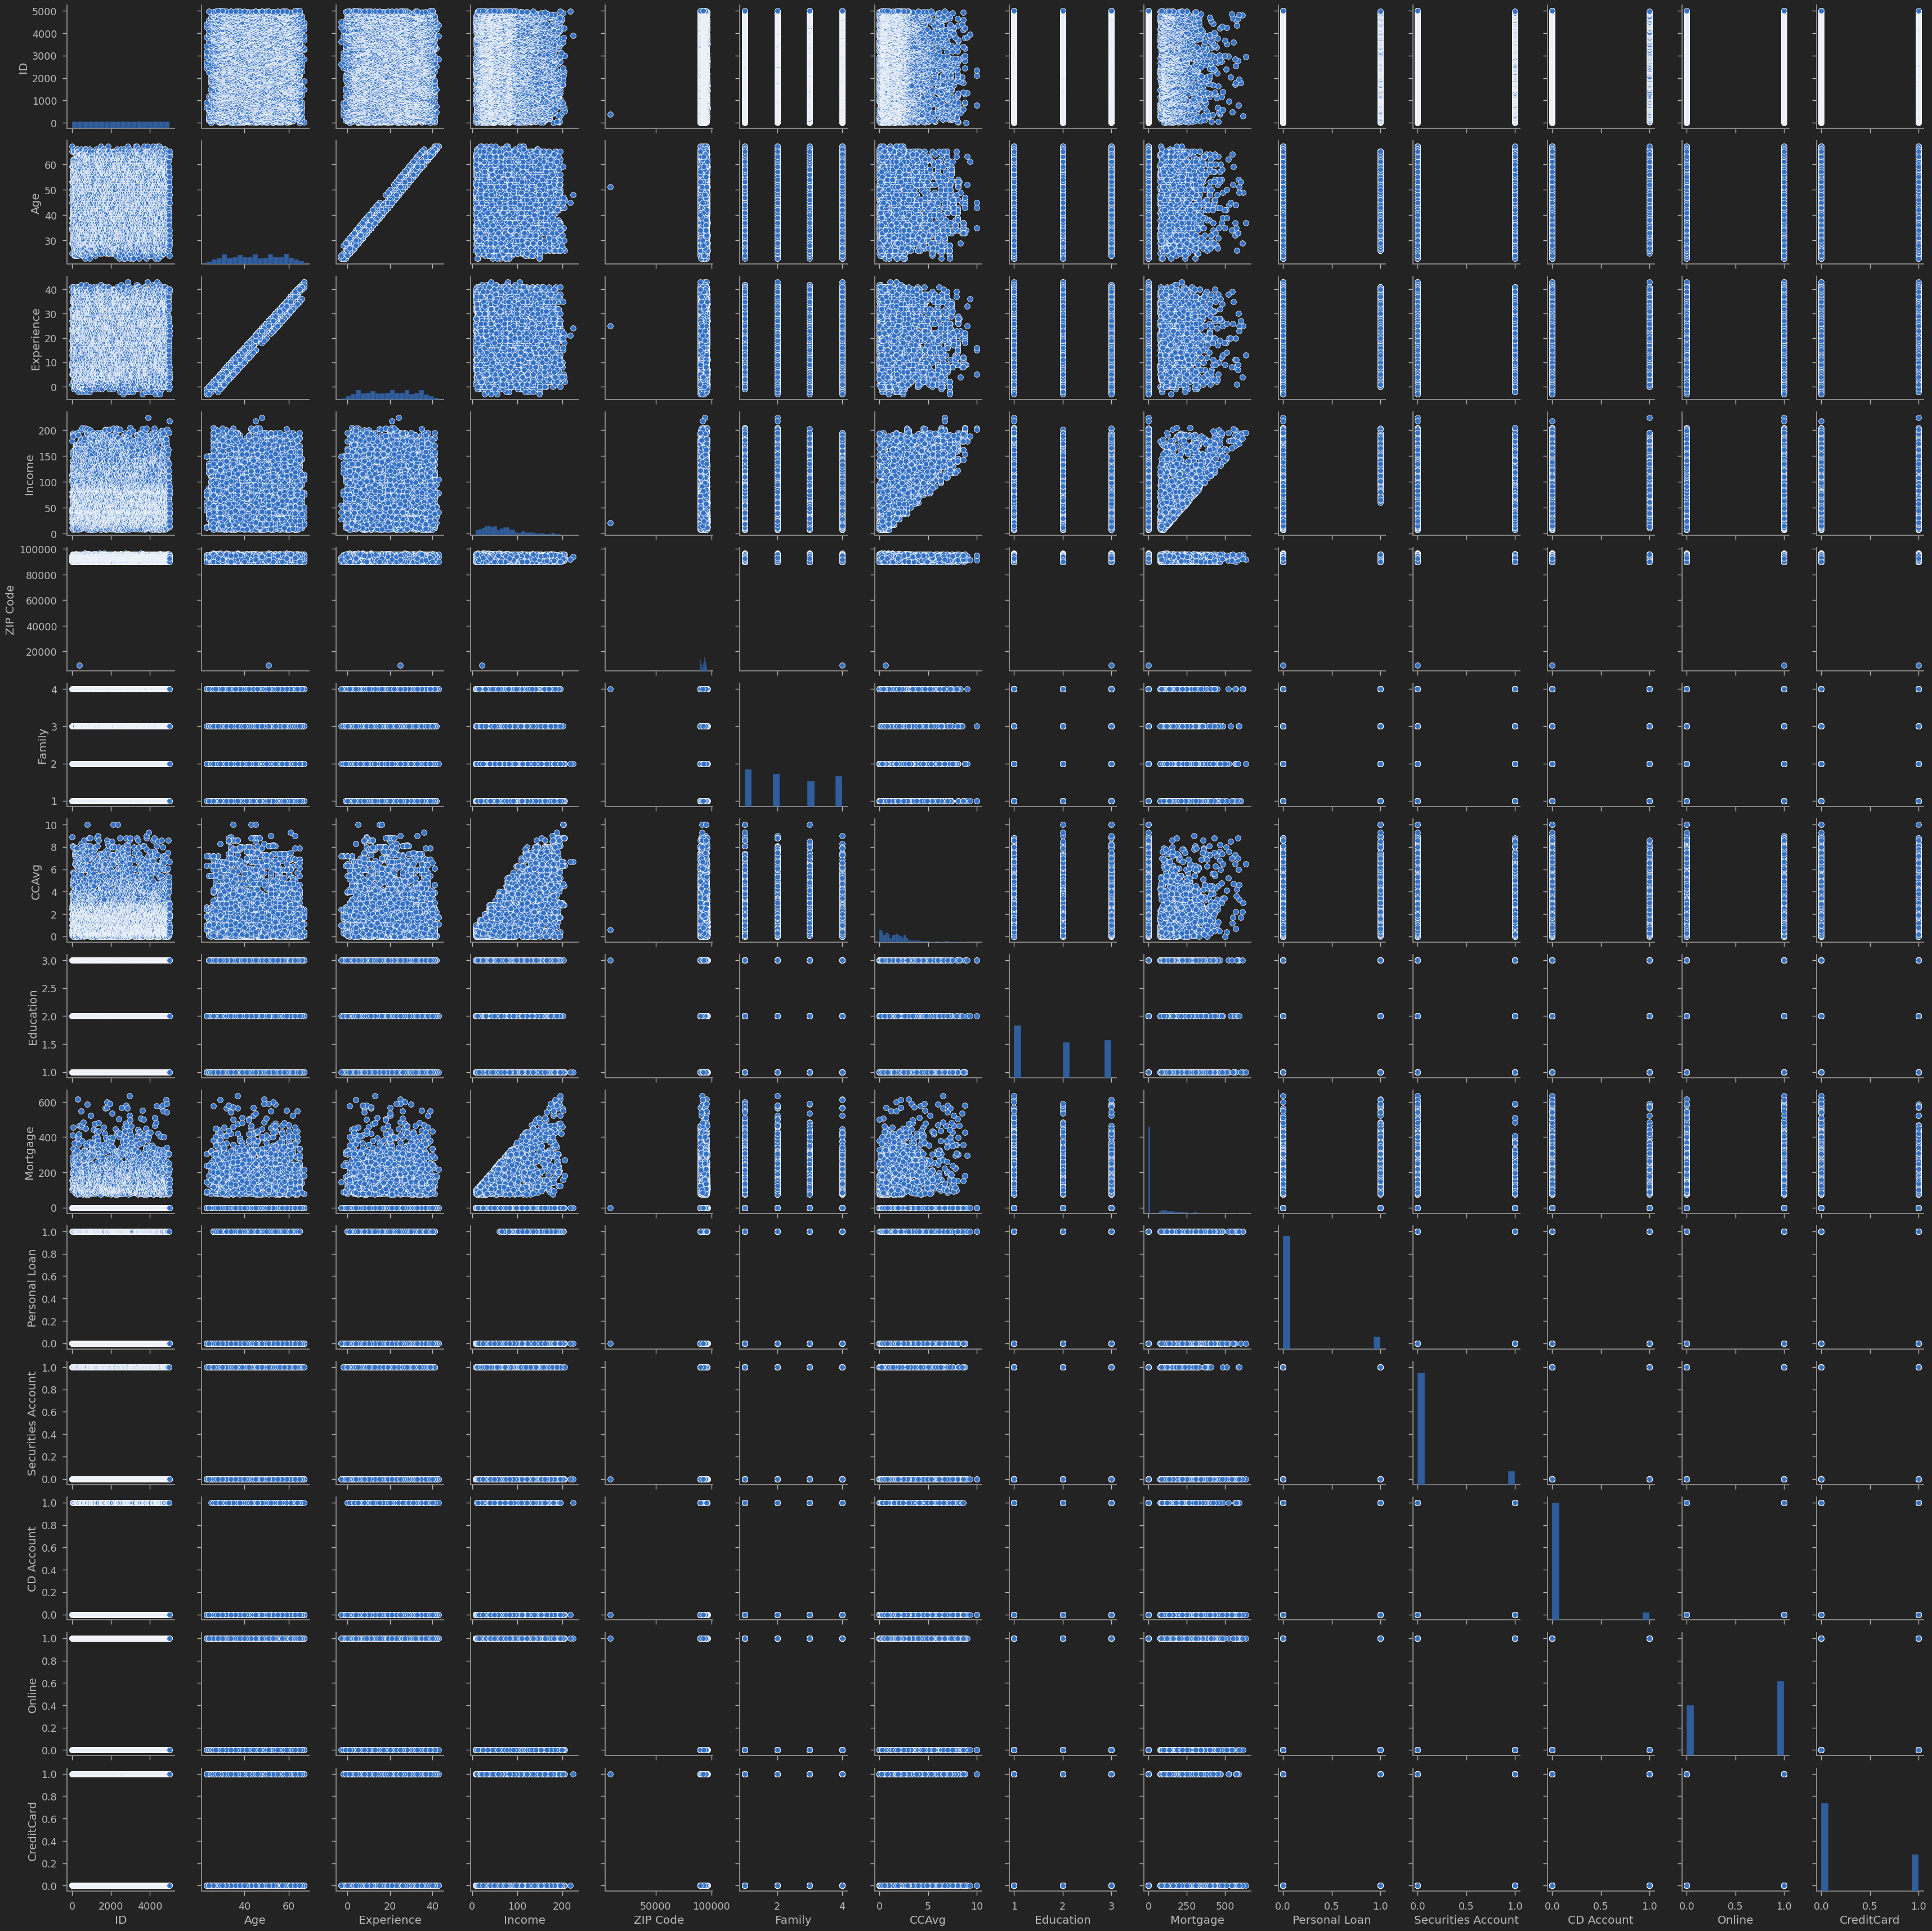

In [28]:
# Plot pairplot
plt.figure(figsize = (30, 30))
sns.pairplot(bank_df)

<Axes: >

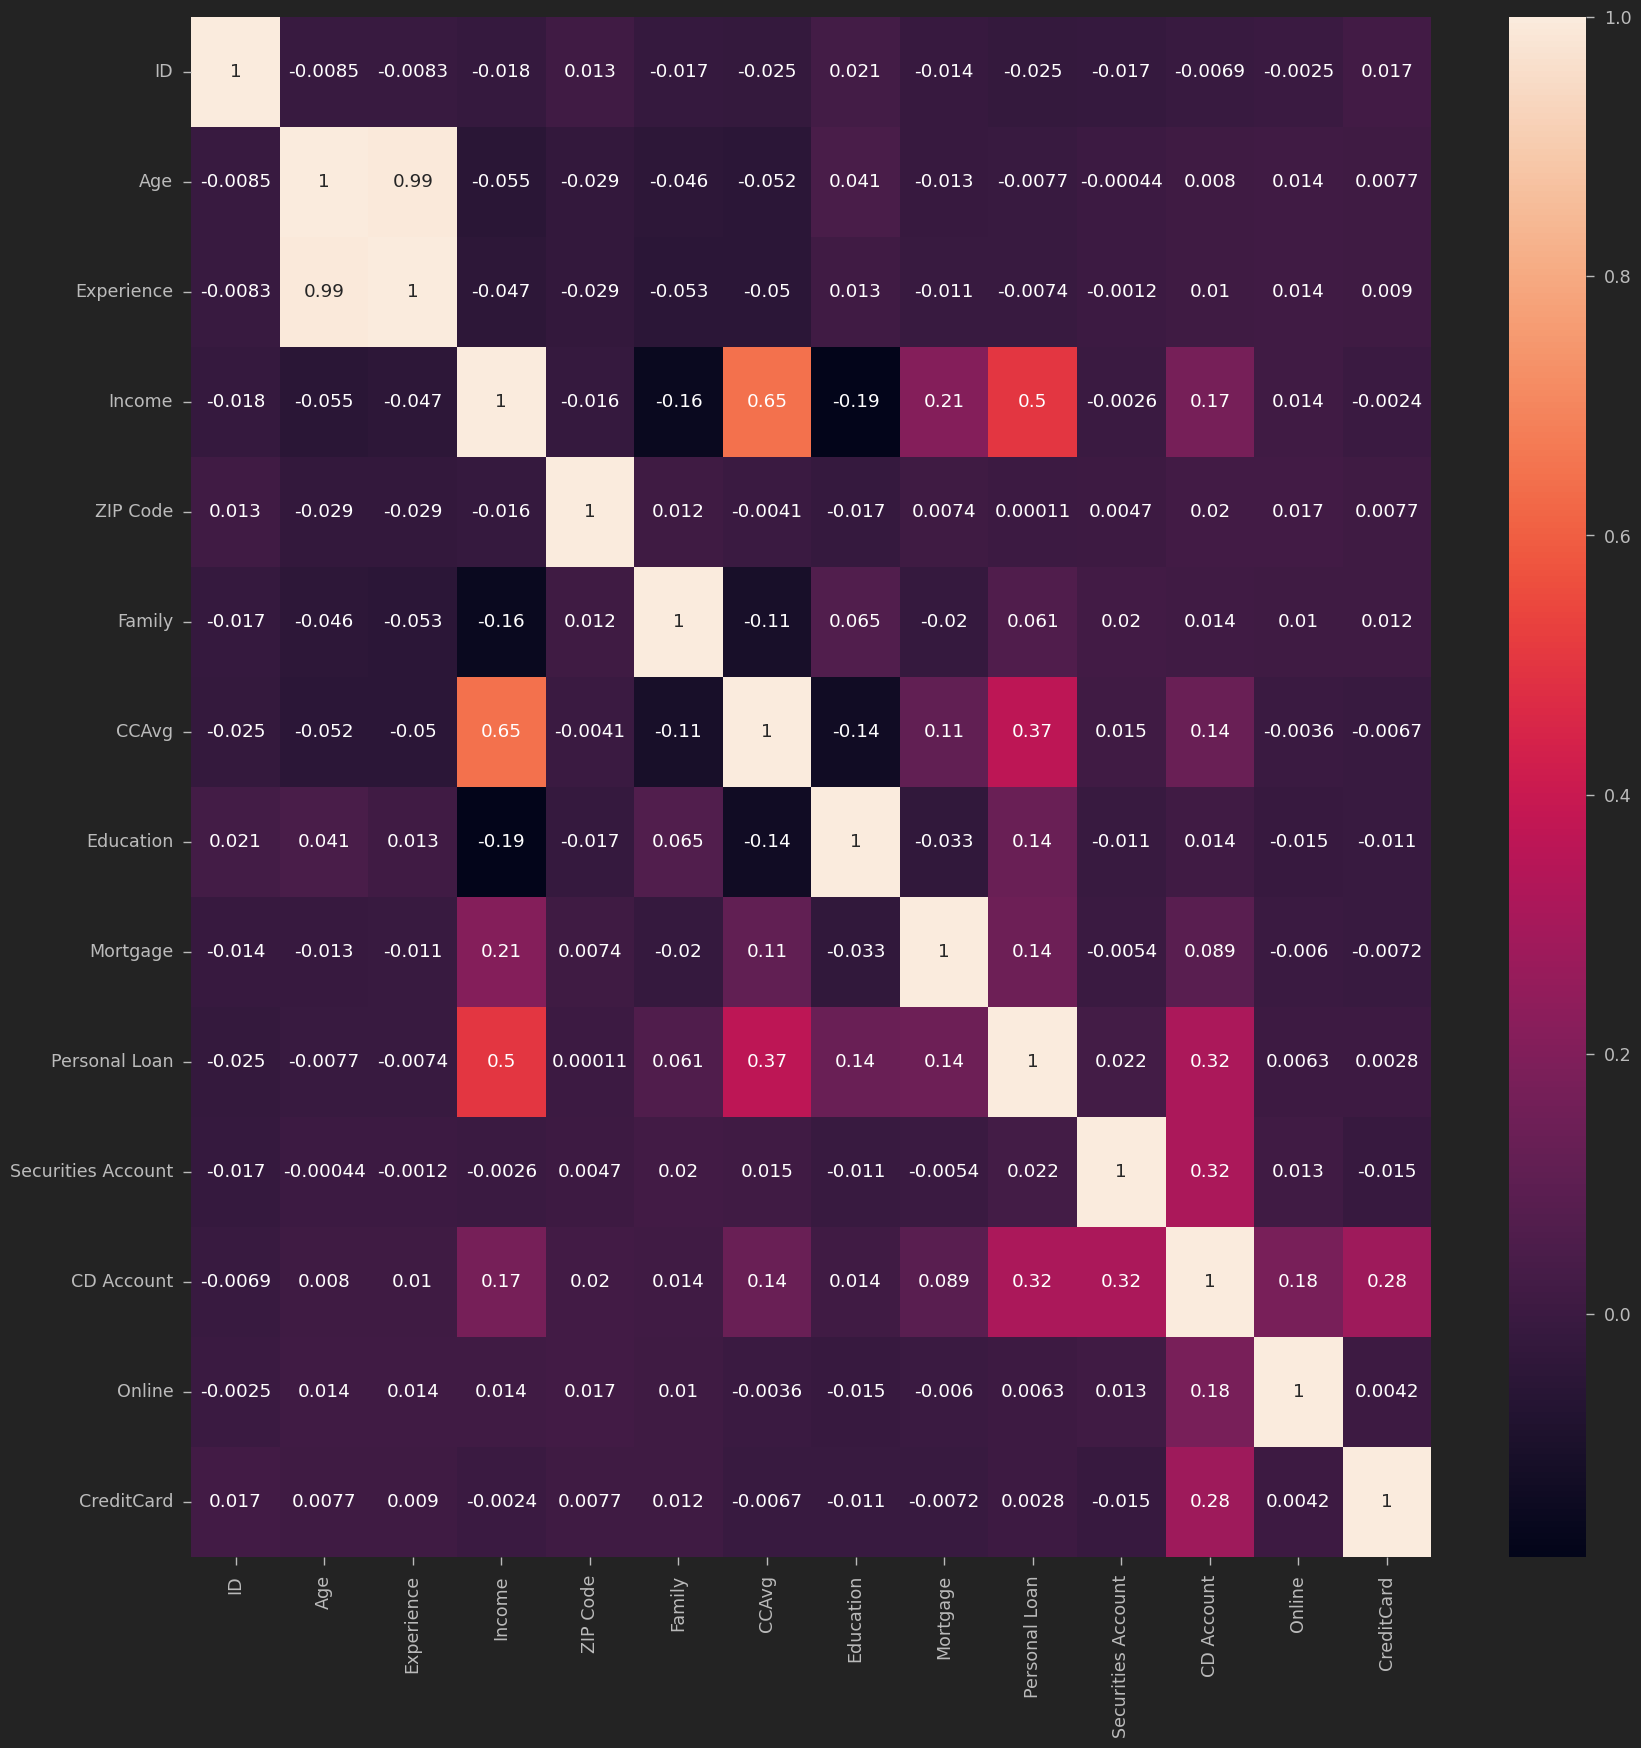

In [29]:
# Correlation plot
# Stong Positive correlation between experience and age
# Strong positive correlation between CC average and income
plt.figure(figsize = (20, 20))
cm = bank_df.corr()
sns.heatmap(cm,annot=True)

MINI CHALLENGE #3:
- Plot the distribution plot of the Average Credit Card Spending
- Plot the distribution of the average credit spending for each of the classes (personal loans = yes and personal loans = No) 

<ipython-input-30-7e1a437855f7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=bank_df['CCAvg'])


<Axes: ylabel='Density'>

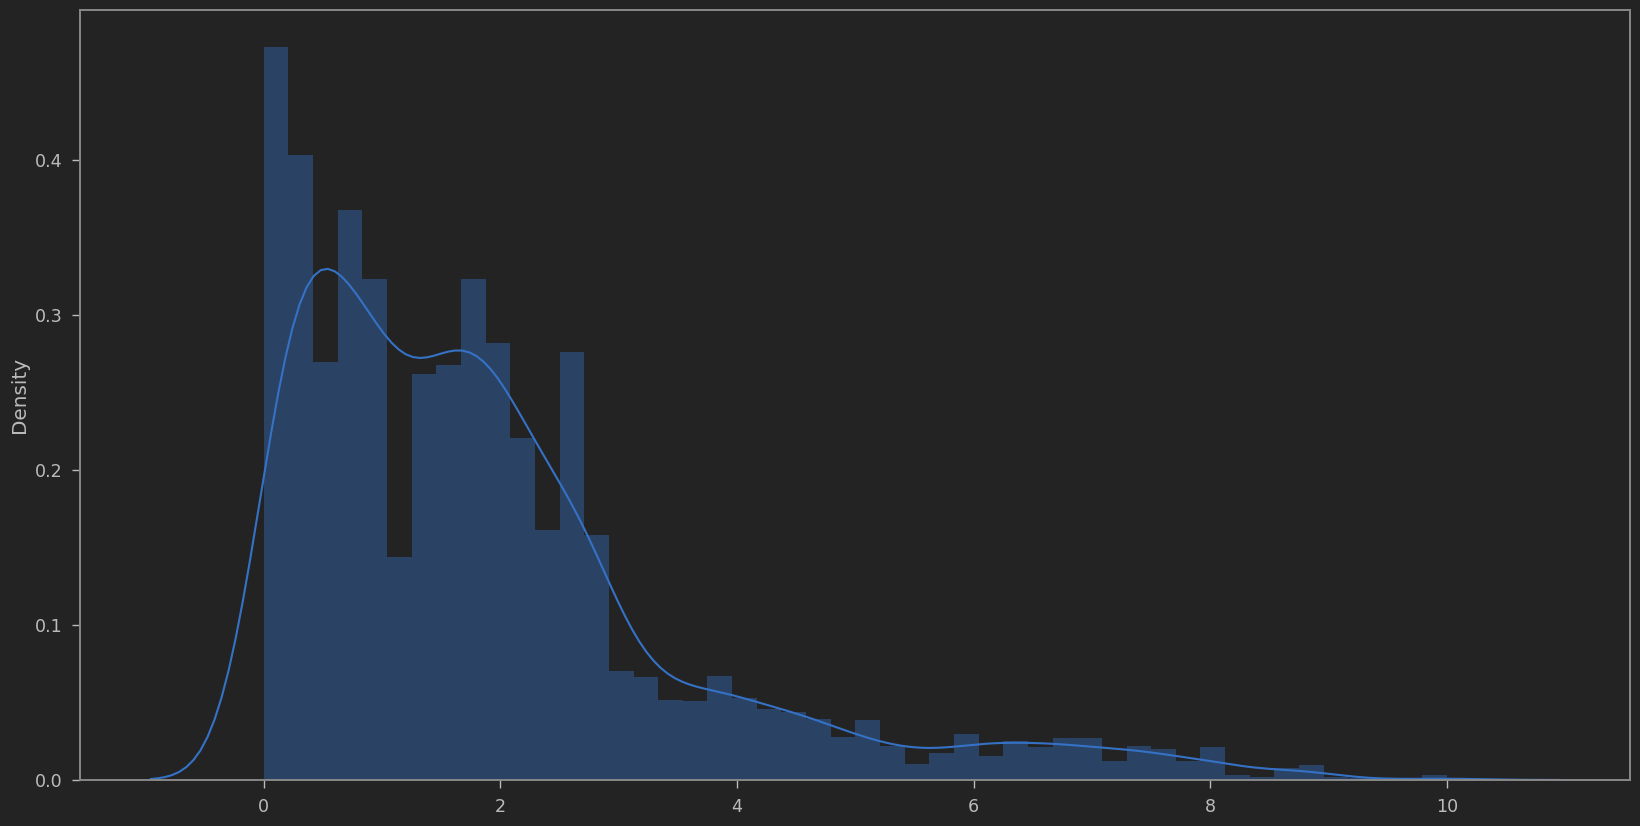

In [30]:
plt.figure(figsize=(20,10))
sns.distplot(x=bank_df['CCAvg'])

<ipython-input-31-635277b58199>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=personalloans['CCAvg'],color='g')
<ipython-input-31-635277b58199>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=no_personalloans['CCAvg'],color='r')


<Axes: ylabel='Density'>

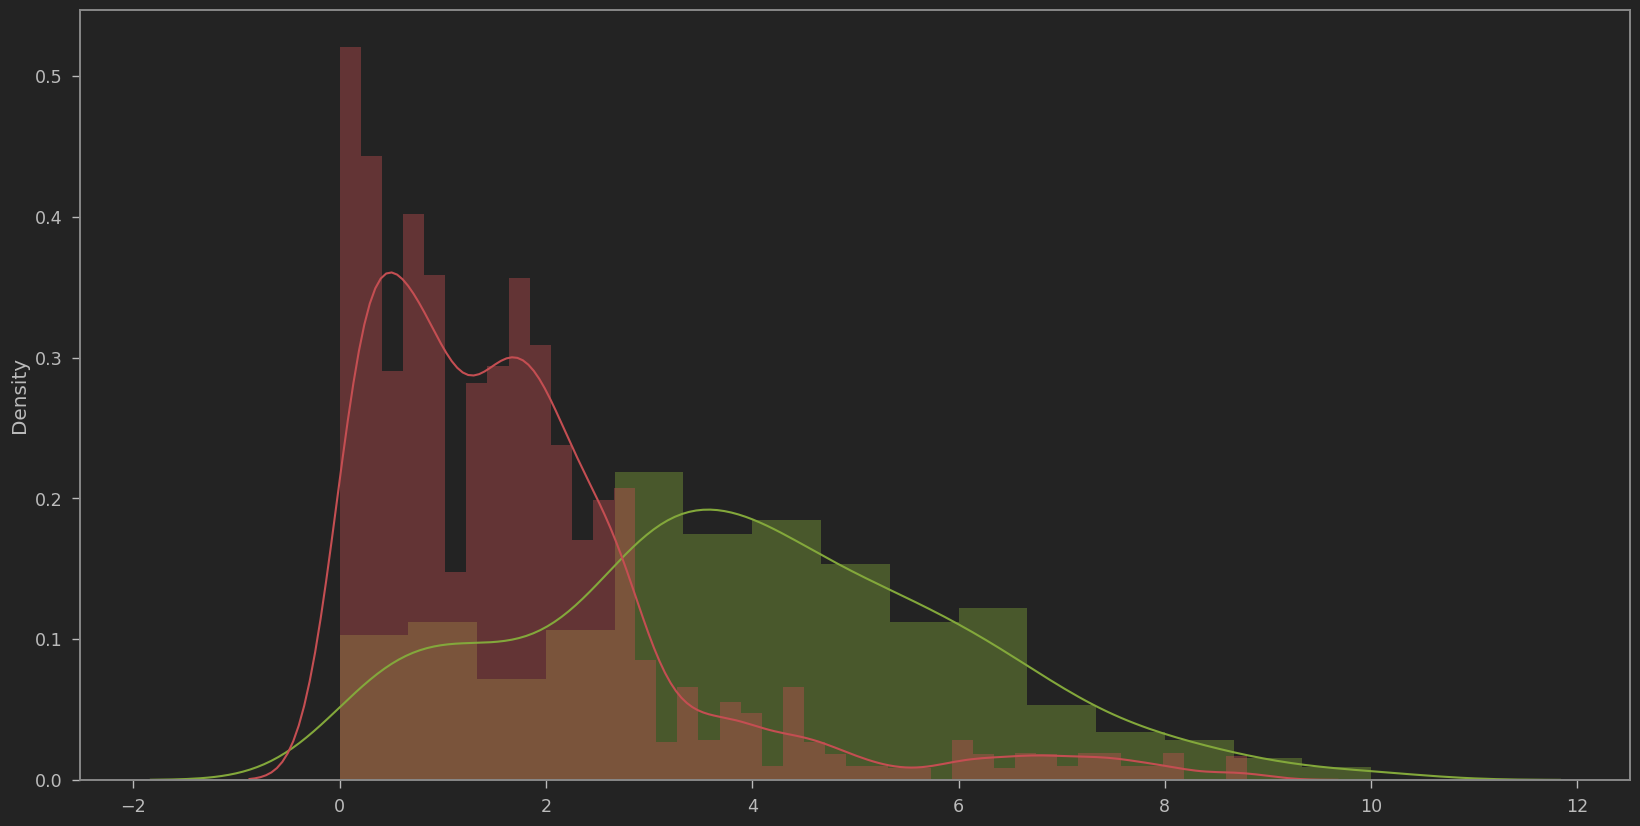

In [31]:
plt.figure(figsize=(20,10))
sns.distplot(x=personalloans['CCAvg'],color='g')
sns.distplot(x=no_personalloans['CCAvg'],color='r')

# TASK #4: PREPARE THE DATA BEFORE TRAINING THE MODEL

In [32]:
# List all column names
bank_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [33]:
# Specify model input features (all data except for the target variable) 
X = bank_df.drop('Personal Loan',axis=1)
y=bank_df['Personal Loan']

In [34]:
# Model output (target variable)
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [35]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [36]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=c52f7c34f39c64612163f6e7d6049a6eef6237ba90657135900f494b17e97067
  Stored in directory: /root/.cache/pip/wheels/46/b8/69/4f7789b7d2fc0718a44cbc4ae5d40970a40c22c472ae50f0a1
Successfully built sklearn


In [37]:
# scale the data before training the model
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)


In [38]:
# spliting the data into testing and training sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [39]:
# print the shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500, 13), (1500, 13), (3500, 2), (1500, 2))

# TASK #5: BUILD A SIMPLE MULTI LAYER NEURAL NETWORK MODEL

In [51]:
# Create keras sequential model
ANN_model = keras.Sequential()
# Add dense layer
ANN_model.add(Dense(250, input_dim = 13, kernel_initializer = 'normal',activation = 'relu'))

ANN_model.add(Dropout(0.3)) # Prevent overfitting by dropping neurons in the layer
ANN_model.add(Dense(500,activation='relu'))

ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(500,activation='relu'))

ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(500,activation='relu'))

ANN_model.add(Dropout(0.4))
ANN_model.add(Dense(250,activation='linear'))

ANN_model.add(Dropout(0.4))

# Add dense layer (output layer) with softmax activation
ANN_model.add(Dense(2, activation = 'softmax'))
ANN_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 250)               3500      
                                                                 
 dropout_16 (Dropout)        (None, 250)               0         
                                                                 
 dense_20 (Dense)            (None, 500)               125500    
                                                                 
 dropout_17 (Dropout)        (None, 500)               0         
                                                                 
 dense_21 (Dense)            (None, 500)               250500    
                                                                 
 dropout_18 (Dropout)        (None, 500)               0         
                                                                 
 dense_22 (Dense)            (None, 500)              

# TASK #8: COMPILE AND TRAIN DEEP LEARNING MODEL

In [52]:
# Compile the model
ANN_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [53]:
history=ANN_model.fit( x=X_train , y=y_train , epochs=40 , validation_split=0.2 , verbose=1)

Epoch 1/40
88/88 [==============================] - 3s 13ms/step - loss: 0.1984 - accuracy: 0.9282 - val_loss: 0.1154 - val_accuracy: 0.9657
Epoch 2/40
88/88 [==============================] - 1s 11ms/step - loss: 0.1083 - accuracy: 0.9568 - val_loss: 0.1121 - val_accuracy: 0.9643
Epoch 3/40
88/88 [==============================] - 1s 11ms/step - loss: 0.0879 - accuracy: 0.9671 - val_loss: 0.1211 - val_accuracy: 0.9586
Epoch 4/40
88/88 [==============================] - 1s 12ms/step - loss: 0.0833 - accuracy: 0.9707 - val_loss: 0.1089 - val_accuracy: 0.9714
Epoch 5/40
88/88 [==============================] - 1s 10ms/step - loss: 0.0746 - accuracy: 0.9764 - val_loss: 0.1150 - val_accuracy: 0.9643
Epoch 6/40
88/88 [==============================] - 1s 11ms/step - loss: 0.0745 - accuracy: 0.9764 - val_loss: 0.0905 - val_accuracy: 0.9743
Epoch 7/40
88/88 [==============================] - 1s 10ms/step - loss: 0.0582 - accuracy: 0.9793 - val_loss: 0.1010 - val_accuracy: 0.9714
Epoch 8/40
88

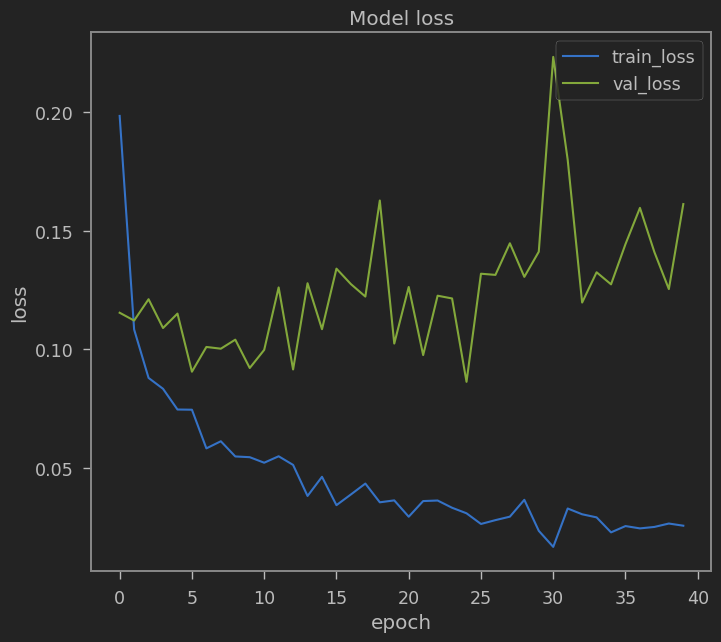

In [54]:
# Plot the model performance across epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

# TASK #9: ASSESS THE PERFORMANCE OF THE TRAINED MODEL

In [ ]:
# Make predictions
predictions = ANN_model.predict(X_test)

# Append the index of max value using argmax function
predict = []
for i in predictions:
    predict.append(np.argmax(i))

In [ ]:
# Get the acccuracy of the model
result = ANN_model.evaluate(X_test, y_test)

print("Accuracy : {}".format(result[1]))

500/500 [==============================] - 0s 274us/sample - loss: 0.0576 - accuracy: 0.9820
Accuracy : 0.9819999933242798


In [ ]:
# Get the original values
y_original = []

for i in y_test:
    y_original.append(np.argmax(i))

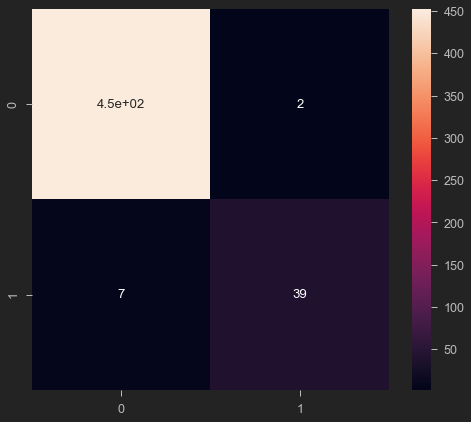

In [ ]:
# Plot Confusion Matrix


In [ ]:
# Print out the classification report


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       454
           1       0.95      0.85      0.90        46

    accuracy                           0.98       500
   macro avg       0.97      0.92      0.94       500
weighted avg       0.98      0.98      0.98       500



# GREAT JOB!

# MINI CHALLENGE SOLUTIONS

MINI CHALLENGE #1 SOLUTION:
- Use bank_df.head() to show the first 10 rows in a dataframe
- Show last 10 rows in the dataframe 
- How many samples are present in the Universal Bank Dataset?

In [ ]:
bank_df.head(10)

In [ ]:
bank_df.tail(10)
# There are 5000 samples in the dataset

MINI CHALLENGE #2 SOLUTION:
- What is the average age in this dataset?
- What is the % of customers who have credit cards?
- What is the % of customers who accepted the personal loan?

In [ ]:
# Average age in this dataset = 45.33 years

creditcard_customers = bank_df[bank_df['CreditCard'] == 1]
creditcard_customers

len(creditcard_customers)

# Total number of customers
len(bank_df)

CC_Customers_percent = len(creditcard_customers)/len(bank_df) * 100
print('Percentage of Customers who have credit cards is = ', CC_Customers_percent,'%')

In [ ]:
accepted_customers = bank_df[bank_df['Personal Loan'] == 1]
accepted_customers

len(accepted_customers)

# Total number of customers
len(bank_df)

accepted_customers_percent = len(accepted_customers)/len(bank_df) * 100
print('Percentage of Customers who accepted the personal loan offer = ', accepted_customers_percent,'%')

MINI CHALLENGE #3 SOLUTION:
- Plot the distribution plot of the Average Credit Card Spending
- Plot the distribution of the average credit spending for each of the classes (personal loans = yes and personal loans = No) 

In [ ]:
# Visualize the data
# Most customers Credit card spending is between 0-4K 
# Data is positively skewed 
plt.figure(figsize = (20, 10))
sns.distplot(bank_df['CCAvg'])

In [ ]:
# Plot the distribution plot for both classes separately 
# Customers who have large CC Average tend to have personal loans
plt.figure(figsize = (20, 10))
sns.distplot(personalloans['CCAvg'], color = 'g')
sns.distplot(no_personalloans['CCAvg'], color = 'r')

MINI CHALLENGE #4 SOLUTION:
- Create a testing dataset that contains 30% of the data instead of 10%. 


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
# print the shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

MINI CHALLENGE #5 SOLUTION:
- Create a new model with an additional Fully connected layer with 500 neurons and linear activation function
- Print out the model summary. Roughly, how many trainable parameters have been newly introduced?

In [ ]:
# Create keras sequential model
ANN_model = keras.Sequential()

# Add dense layer
ANN_model.add(Dense(250, input_dim = 13, kernel_initializer = 'normal',activation = 'relu'))

# Add dropout layer
ANN_model.add(Dropout(0.3))

# Add dense layer
ANN_model.add(Dense(500, activation = 'relu'))

# Add dropout layer
ANN_model.add(Dropout(0.3))

# Add dense layer
ANN_model.add(Dense(500, activation = 'relu'))

# Add dropout layer
ANN_model.add(Dropout(0.4))

# Add dense layer
ANN_model.add(Dense(250, activation = 'linear'))

# Add dropout layer
ANN_model.add(Dropout(0.5))

# Add dense layer
ANN_model.add(Dense(500, activation = 'linear'))

# Add dense layer with softmax activation
ANN_model.add(Dense(2, activation = 'softmax'))
ANN_model.summary()

In [ ]:
MINI CHALLENGE #6 SOLUTION:
- Retrain the model using more number of epochs and a different validation datset

In [ ]:
history = ANN_model.fit(X_train, y_train, epochs = 30, validation_split = 0.3, verbose = 1)
